# NOTEBOOK NAME

Author  : David Darigan

ID      : C00263218

## Process

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modelling
5. Evaluation
6. Goto 1

## CHANGELOG

The changes are listed in descending order (the most-recent change will be at the bottom)

### Change #1

- Use dataset 'mushroom_1.csv'
- Use KMeansCluster with a cluster of 3

<img src="img/score.png" width=500>
<br>
<img src="img/confusion.png" width=500>
<br>

Observations

- Poor score
- Poor confusion matrix
- I think this dataset just isn't good

### Change #2

- Changed data sk.learn.make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)
- Used KMeans(cluster = 4)

__Before Modelling__
<br>
<img src="img/initial.png" width=500>
<br>

__After Modelling__
<br>
<img src="img/cluster.png" width=500>
<br>

Observations

- The small blue cluster is an outlier (presumably because there are more clusters than they are centers)

### Change #3

- Changed clusters in Model to 3 to match current cluster centers

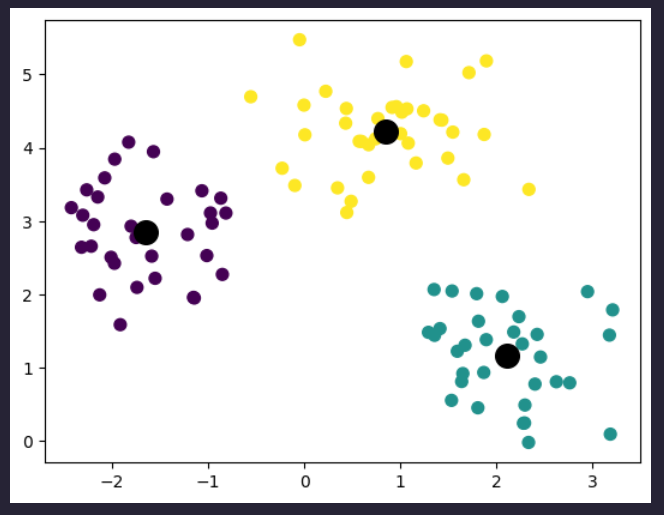

Observations

- Clusters are neatly measured, which seems to be because there is a 1-to-1 relationship between centers and clusters (3 clusters, 3 centers)

### Change #4

- Reduce sample size from 100 to 10
- Adding scoring table

__Samples__
<br>
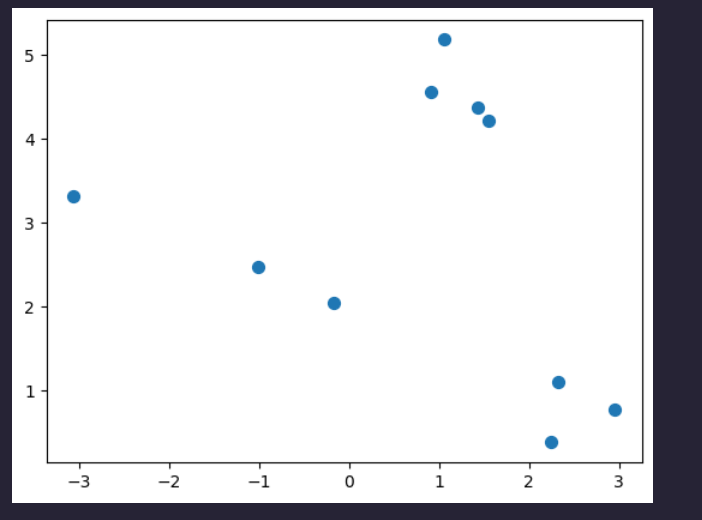
<br>

__Scoring__
<br>
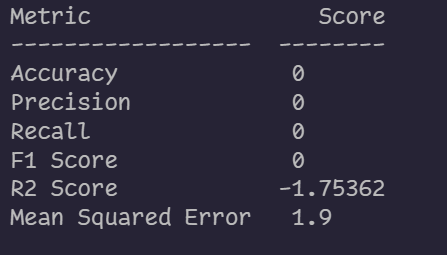
<br>

__Clusters__
<br>
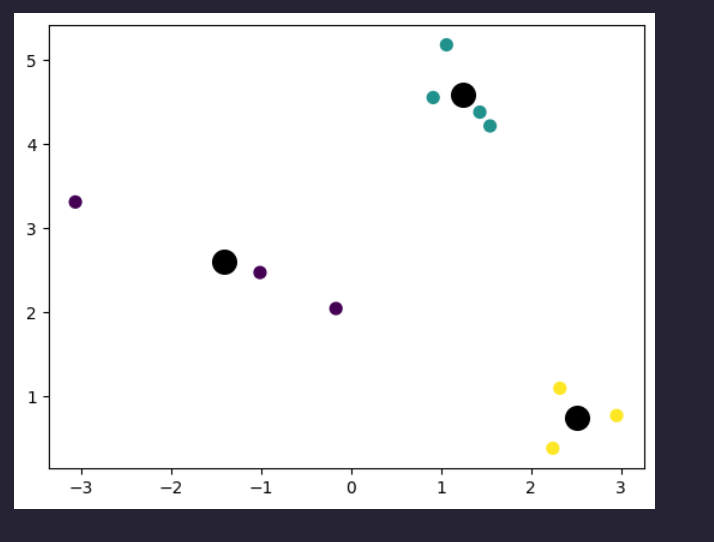
<br>

Observations

- The sample size is too low for the scoring to give any meaningful accuracy
- Visually, the clusters seem to be roughly accurate

### Change #5

- Increase sample size from 10 to 100

__Samples__
<br>
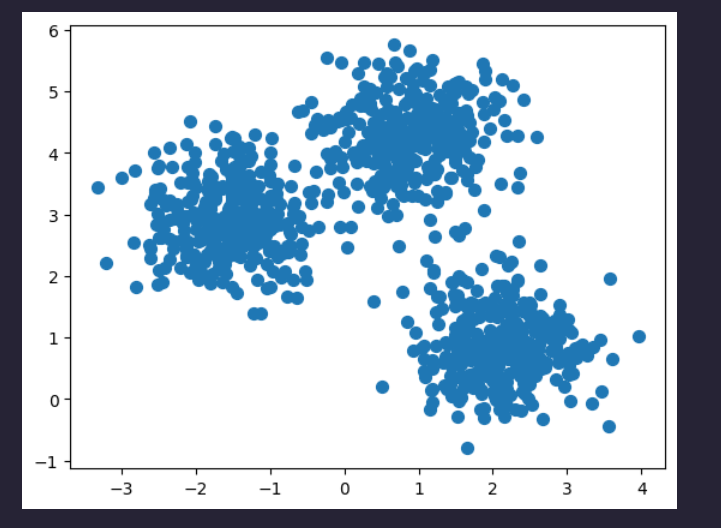
<br>

__Clusters__
<br>
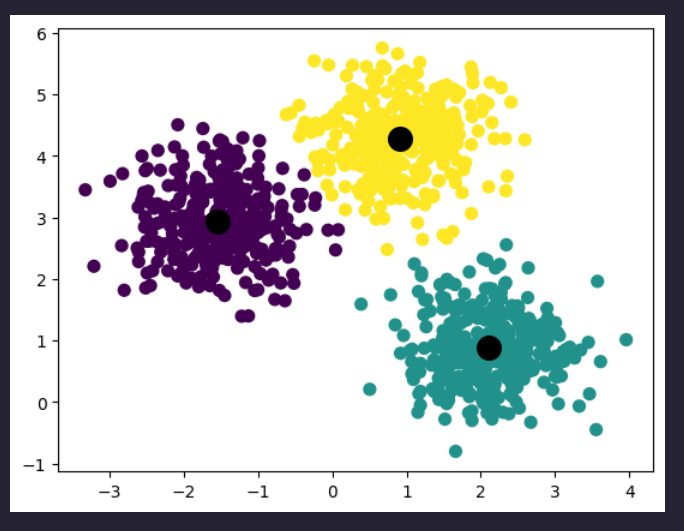
<br>

__Scoring__
<br>
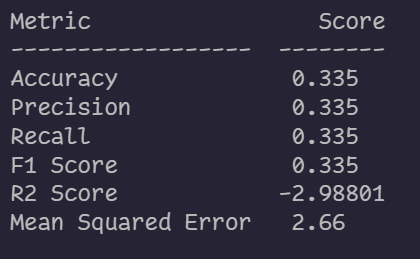
<br>

Observations

- Sample size is large enough to calculate meaningful accuracy
- R2 score is terrible
- MSE score is also significantly poor
    - These scores might not be an issue of it being an accuracy but rather that the data isn't random enough

### Change #6

- Change random state from 0 to 42

__Samples__
<br>
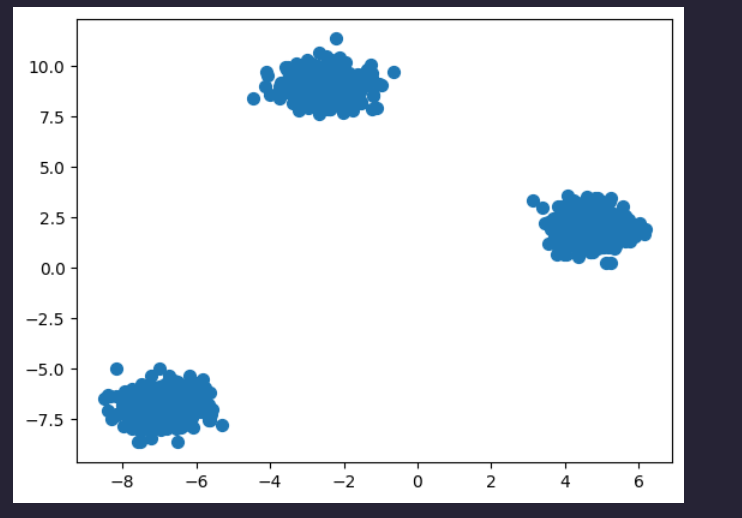
<br>

__Clusters__
<br>
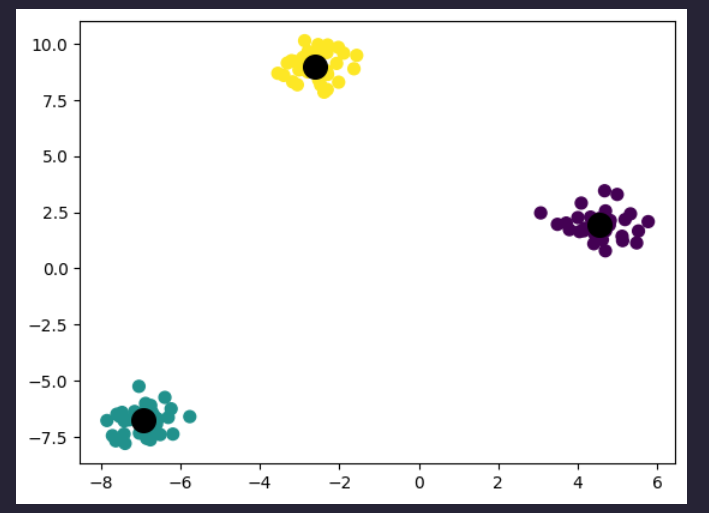
<br>

__Scoring__
<br>
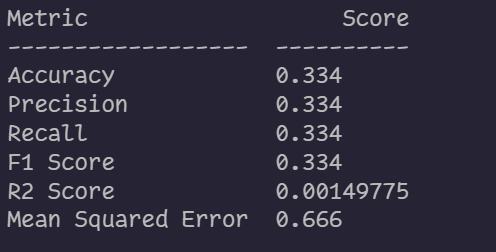
<br>

Observations

- Scores have significantly improved
    - This leads credibility to the hypothesis in Change 5 that the model efficiency wasn't poor data but rather a limited distribution of it

### Change #7

- Increase sample centers & clusters to 100

__Sample__
<br>
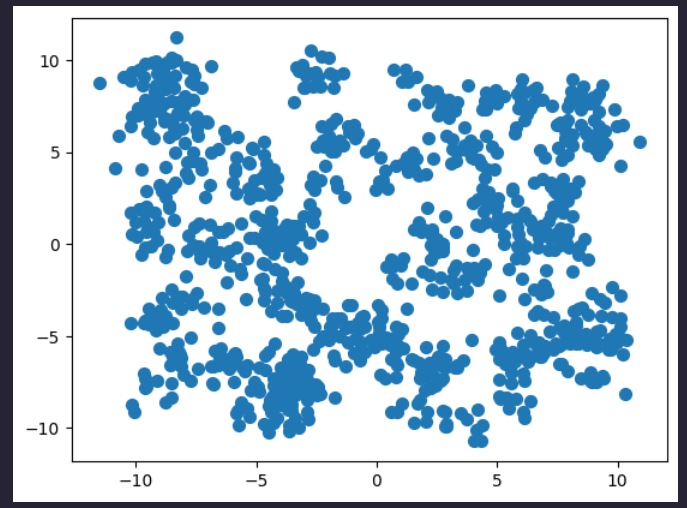
<br>

__Clusters__
<br>
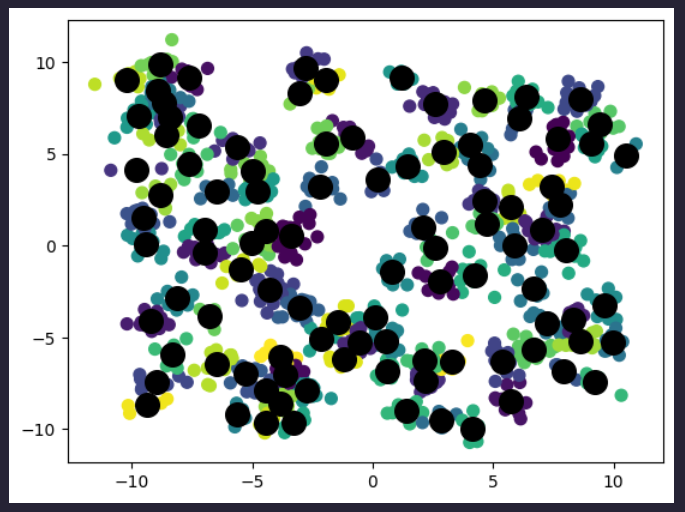
<br>

__Scoring__
<br>
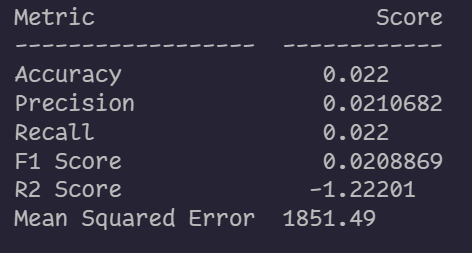
<br>

Observations

- Scores are terrible again
- I believe the issue here might be that there are too many clusters which are consuming points before the next cluster can take them, therefore forcing other clusters to be inaccurate due to a limited availablity of 'correct' points

### Change #8

- Change clusters to 10 from 100

__Clusters__
<br>
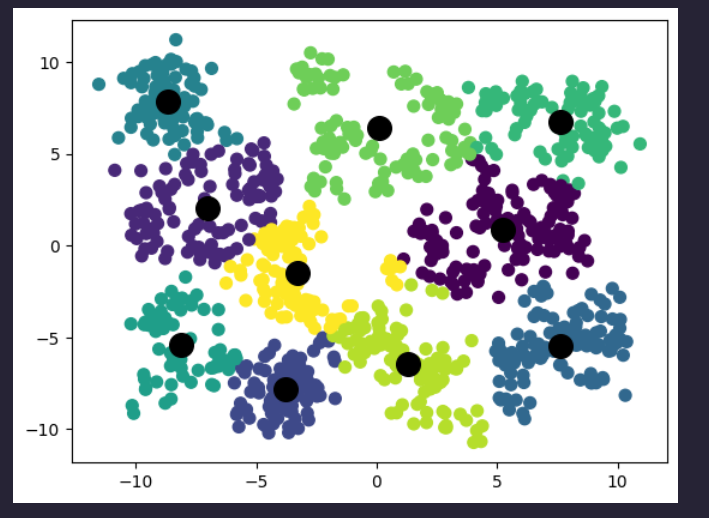
<br>
__Scoring__
<br>
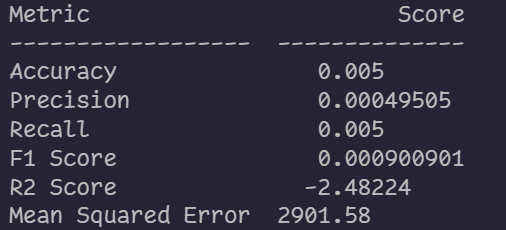
<br>

Observations

- Scoring has performed worse
- The hypothesis about clusters fighting over data in Change 7 seems to be disproven by this change

### Change #9

- Use BisectingKMeans with random state = 13 and n_clusters = 3

__Clusters__
<br>
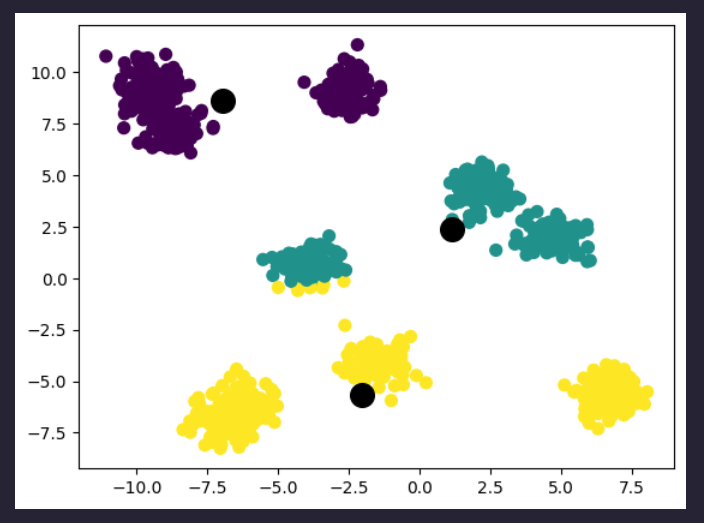
<br>


__Scoring__
<br>
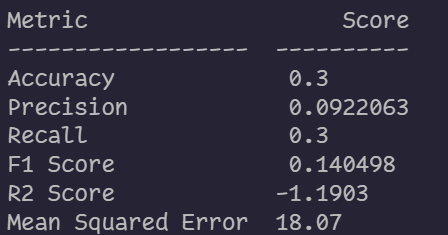
<br>

Observations

- No major improvement
- Clusters are very off-center in the scatter plot

### Change #10

- Use MinibatchKMeans with clusters = 8

__Clusters__
<br>
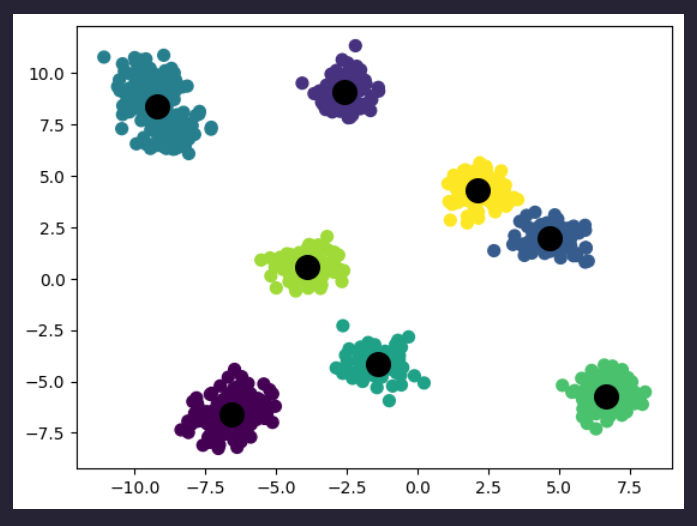
<br>

__Scoring__
<br>
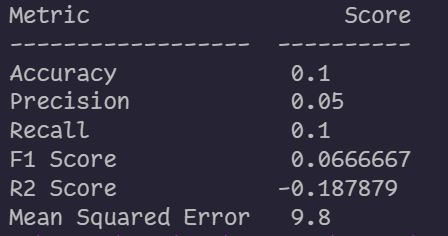
<br>

Observations

- Score is still poor

## CODE

### Dependencies

In [2]:
%pip install tabulate
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install tensorflow
%pip install pandas


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     -------------------------------------- 162.3/162.3 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.1/7.6 MB 36.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/7.6 MB 44.2 MB/s eta 0:00:01
   --------------------- ------------------ 4.1/7.6 MB 32.6 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.6 MB 40.8 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 40.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/187.6 kB ? eta -:--:--
   ---------------------------------------- 187.6/187.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/

### 1. Business Understanding

Using sample data from sklearn.datasets

### 2. Data Understanding

In [152]:
# Data Collection
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y_test = make_blobs(n_samples=1000, centers=10,
                       cluster_std=0.60, random_state=42)


#### 2.2 Data Visualization

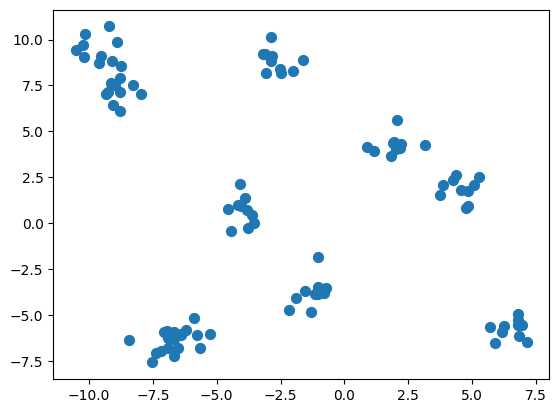

In [139]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=50)


### 4. Modelling

In [215]:
# Select Modeling Technique
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=8)
kmeans.fit(X)
y_pred = kmeans.predict(X)



### 5 Evaluation

##### 5.1 Score Table

In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from tabulate import tabulate


# Compute cross-validated scores
accuracy_scores = accuracy_score(y_true=y_test, y_pred=y_pred)
precision_scores = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall_scores = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1_scores = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
r2_scores = r2_score(y_true=y_test, y_pred=y_pred)
mean_squared_errors = mean_squared_error(y_true=y_test, y_pred=y_pred)

# # Tabulate the scores
headers = ['Metric', 'Score']
scores = [
    ['Accuracy', accuracy_scores],
    ['Precision', precision_scores],
    ['Recall', recall_scores],
    ['F1 Score', f1_scores],
    ['R2 Score', r2_scores],
    ['Mean Squared Error', mean_squared_errors]
]

# # Print the table
print(tabulate(scores, headers=headers))

Metric                   Score
------------------  ----------
Accuracy             0.1
Precision            0.05
Recall               0.1
F1 Score             0.0666667
R2 Score            -0.187879
Mean Squared Error   9.8


C:\Users\Darigan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


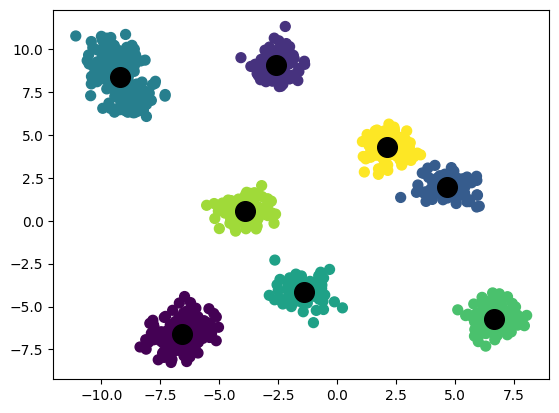

In [217]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)

### Deployment

In [7]:
import joblib

# Pickling The Model
# joblib.dump(model, "model.pkl")